# Experiment 1

*Feature Set 1 (Hahne):*
1. Logarithm of the variance (logVAR)

*Feature Set 2 (Hudgins):*
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

*Feature Set 3 (Phinyomark):*
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)



## Load Results

First: Import the library developed to visualize the results

In [2]:
import VisualizationFunctions as VF1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load of the DA-based adaptation techniques' results over the three databases (First Research Question).

In [3]:
place='../ResultsExp1_RQ1/'

# Nina Pro 5 database
database='NinaPro5'
resultsNinaPro5,timeNinaPro5=VF1.uploadResultsDatabase(place, database)

# Cote-Allard database
database='Cote'
resultsCote,timeCote=VF1.uploadResultsDatabase(place, database)

# EPN database
database='EPN'
resultsEPN,timeEPN=VF1.uploadResultsDatabase(place, database)


### load data

In [4]:

def uploadResultsDatabase(folder, database):
    if database == 'Nina5':
        samples = 3
        peoplei_i = 1
        peoplei_f = 10
    elif database == 'Cote':
        samples = 3
        peoplei_i = 20
        peoplei_f = 36
    elif database == 'EPN':
        samples = 24
        peoplei_i = 31
        peoplei_f = 60
    place = folder + database
    resultsTest = pd.read_csv(place + "_FeatureSet_1_startPerson_" + str(peoplei_i) + "_endPerson_" + str(peoplei_i) + ".csv")
    if len(resultsTest) != samples:
        print('error' + ' 1' + ' 1')
        print(len(resultsTest))

    for i in range(peoplei_i+1, peoplei_f + 1):
        auxFrame = pd.read_csv(place + "_FeatureSet_1_startPerson_" + str(i) + "_endPerson_" + str(i) + ".csv")
        resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)
        if len(auxFrame) != samples:
            print('error' + ' 1 ' + str(i))
            print(len(auxFrame))
    for j in range(2, 4):
        for i in range(peoplei_i, peoplei_f + 1):
            auxFrame = pd.read_csv(
                place + "_FeatureSet_" + str(j) + "_startPerson_" + str(i) + "_endPerson_" + str(i) + ".csv")
            resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)

            if len(auxFrame) != samples:
                print('error' + ' ' + str(j) + ' ' + str(i))
                print(len(auxFrame))

    return resultsTest.drop(columns='Unnamed: 0')





## One Shot
### LDA

In [31]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

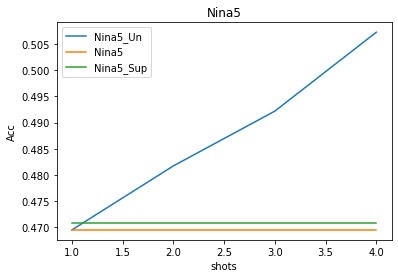

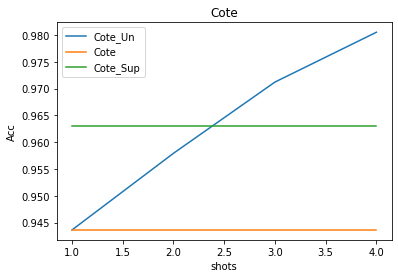

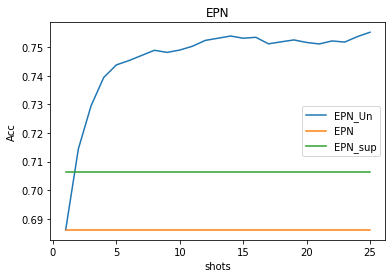

In [32]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()






## One Shot
### QDA

In [6]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


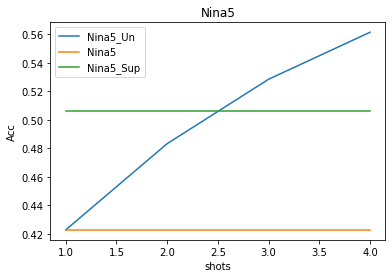

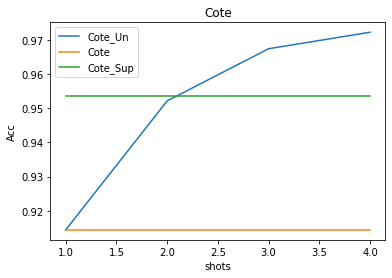

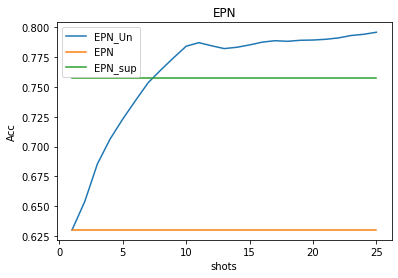

In [7]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()


## Two Shot
### LDA

In [8]:
resultsNina5RQ2_2= pd.read_csv("Nina5_Uns_2Shots.csv")
resultsNina5RQ2= pd.read_csv("Nina5_Uns.csv")
resultsCoteRQ2_2= pd.read_csv("Cote_Uns_2Shots.csv")
resultsCoteRQ2= pd.read_csv("Cote_Uns.csv")
resultsEPNRQ2_2= pd.read_csv("EPN_Uns_2Shots.csv")
resultsEPNRQ2= pd.read_csv("EPN_Uns.csv")

In [9]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


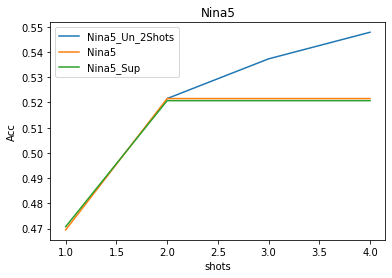

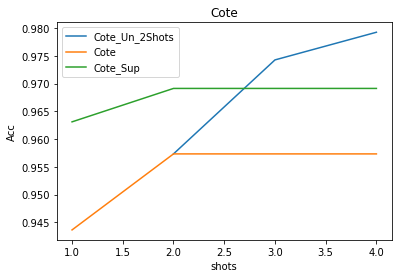

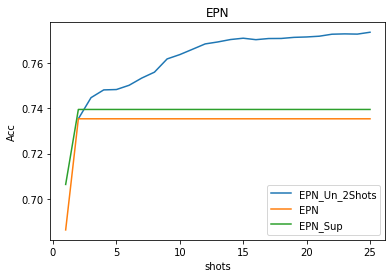

In [10]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()


Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccLDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccLDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccLDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccLDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccLDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()



## Two Shot
### QDA

In [11]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

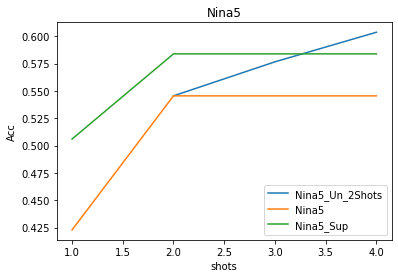

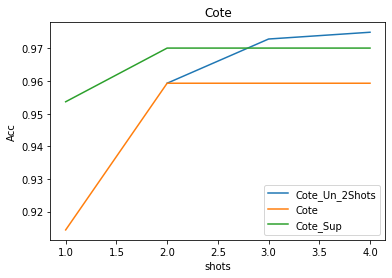

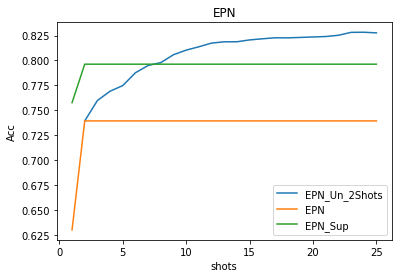

In [12]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccQDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccQDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccQDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccQDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccQDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()



In [7]:
pd.set_option('display.max_rows', 200)
newResultsCote=uploadResultsDatabase('results/', 'Cote')
newResultsNina5=uploadResultsDatabase('results/', 'Nina5')



In [189]:
newResultsNina5[(newResultsNina5['Feature Set']==2)]


,person,subset,# shots,Feature Set,AccLDAfew,AccLDAadapted,AccLDAsemi,AccLDAsemiAdapt,AccLDAsemi_shot,AccLDAsemiAdapt_shot,AccLDAsemi_accumulative,AccLDAsemiAdapt_accumulative,AccQDAfew,AccQDAadapted,AccQDAsemi,AccQDAsemiAdapt,AccQDAsemi_shot,AccQDAsemiAdapt_shot,AccQDAsemi_accumulative,AccQDAsemiAdapt_accumulative
30,1,"[1, 2]",2,2,0.505758,0.500732,0.532824,0.537375,0.532824,0.537375,0.532824,0.537375,0.433580,0.489375,0.403466,0.511100,0.403466,0.511100,0.403466,0.511100
31,1,"[1, 2, 3]",3,2,0.505758,0.500732,0.542677,0.561117,0.540461,0.564639,0.544181,0.569546,0.433580,0.489375,0.480076,0.528036,0.459736,0.534961,0.456650,0.536267
32,1,"[1, 2, 3, 4]",4,2,0.505758,0.500732,0.551700,0.567251,0.556844,0.574967,0.566816,0.580547,0.433580,0.489375,0.520715,0.542796,0.521190,0.553836,0.518025,0.559297
33,2,"[1, 2]",2,2,0.469047,0.484967,0.505543,0.521729,0.505543,0.521729,0.505543,0.521729,0.442395,0.497029,0.477916,0.527716,0.477916,0.527716,0.477916,0.527716
34,2,"[1, 2, 3]",3,2,0.469047,0.484967,0.516630,0.532550,0.514279,0.530599,0.534146,0.545366,0.442395,0.497029,0.499601,0.531264,0.497428,0.529712,0.515078,0.545765
35,2,"[1, 2, 3, 4]",4,2,0.469047,0.484967,0.547805,0.553038,0.533614,0.560355,0.577827,0.581286,0.442395,0.497029,0.530200,0.538670,0.537073,0.539069,0.551530,0.557650
36,3,"[1, 2]",2,2,0.460427,0.509056,0.517522,0.542606,0.517522,0.542606,0.517522,0.542606,0.385991,0.432084,0.416101,0.425247,0.416101,0.425247,0.416101,0.425247
37,3,"[1, 2, 3]",3,2,0.460427,0.509056,0.547179,0.570769,0.549398,0.564158,0.560536,0.575251,0.385991,0.432084,0.451191,0.425201,0.430227,0.425654,0.407226,0.428371
38,3,"[1, 2, 3, 4]",4,2,0.460427,0.509056,0.563162,0.587159,0.576791,0.587250,0.572806,0.581952,0.385991,0.432084,0.474192,0.427239,0.438739,0.429186,0.391741,0.437019
39,4,"[1, 2]",2,2,0.377343,0.355871,0.377499,0.389930,0.377499,0.389930,0.377499,0.389930,0.274658,0.348467,0.357391,0.355013,0.357391,0.355013,0.357391,0.355013


In [28]:

def vectroGraph(prop,adapt_normal,base,featureSet,shots):
    vector=np.zeros(shots)
    vector[0]=base[adapt_normal].loc[(base['# shots']==2)&(base['Feature Set']==featureSet)].mean()
    for i in range(1,shots):
        vector[i]=base[prop].loc[(base['# shots']==i+1)&(base['Feature Set']==featureSet)].mean()
    return vector

In [1]:

def graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote):
    
    Nina5=resultsNinaPro5[DA+'_Ind'].loc[(resultsNinaPro5['Feature Set']==featureSet)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
    Cote=resultsCote[DA+'_Ind'].loc[(resultsCote['Feature Set']==featureSet)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
    EPN=resultsEPN[DA+'_Ind'].loc[(resultsEPN['Feature Set']==featureSet)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
    Nina5_Prop=resultsNinaPro5['PropQ'+propDA].loc[(resultsNinaPro5['Feature Set']==featureSet)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
    Cote_Prop=resultsCote['PropQ'+propDA].loc[(resultsCote['Feature Set']==featureSet)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
    EPN_Prop=resultsEPN['PropQ'+propDA].loc[(resultsEPN['Feature Set']==featureSet)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
    
    ALLshots=4

    Nina5prop1=vectroGraph('Acc'+DA+'semi','Acc'+DA+'few',newResultsNina5,featureSet,ALLshots)
    Nina5prop2=vectroGraph('Acc'+DA+'semi_shot','Acc'+DA+'few',newResultsNina5,featureSet,ALLshots)
    Nina5prop3=vectroGraph('Acc'+DA+'semi_accumulative','Acc'+DA+'few',newResultsNina5,featureSet,ALLshots)


    Coteprop1=vectroGraph('Acc'+DA+'semi','Acc'+DA+'few',newResultsCote,featureSet,ALLshots)
    Coteprop2=vectroGraph('Acc'+DA+'semi_shot','Acc'+DA+'few',newResultsCote,featureSet,ALLshots)
    Coteprop3=vectroGraph('Acc'+DA+'semi_accumulative','Acc'+DA+'few',newResultsCote,featureSet,ALLshots)


    Nina5propAdapt1=vectroGraph('Acc'+DA+'semiAdapt','Acc'+DA+'adapted',newResultsNina5,featureSet,ALLshots)
    Nina5propAdapt2=vectroGraph('Acc'+DA+'semiAdapt_shot','Acc'+DA+'adapted',newResultsNina5,featureSet,ALLshots)
    Nina5propAdapt3=vectroGraph('Acc'+DA+'semiAdapt_accumulative','Acc'+DA+'adapted',newResultsNina5,featureSet,ALLshots)


    CotepropAdapt1=vectroGraph('Acc'+DA+'semiAdapt','Acc'+DA+'adapted',newResultsCote,featureSet,ALLshots)
    CotepropAdapt2=vectroGraph('Acc'+DA+'semiAdapt_shot','Acc'+DA+'adapted',newResultsCote,featureSet,ALLshots)
    CotepropAdapt3=vectroGraph('Acc'+DA+'semiAdapt_accumulative','Acc'+DA+'adapted',newResultsCote,featureSet,ALLshots)



    shot=1
#     Nina5=np.ones(4)*Nina5[shot-1]
#     Cote=np.ones(4)*Cote[shot-1]
    # EPN=np.ones(25)*EPN[shot-1]

#     Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
#     Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
    # EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


    x=[1,2,3,4]
    plt.plot(x,Nina5prop1,label='Nina5_Semi1')
    plt.plot(x,Nina5prop2,label='Nina5_Semi2')
    plt.plot(x,Nina5prop3,label='Semi-Supervised Learning')
    plt.plot(x,Nina5propAdapt1,label='Nina5_SemiAdapt1')
    plt.plot(x,Nina5propAdapt2,label='Nina5_SemiAdapt2')
    plt.plot(x,Nina5propAdapt3,label='Semi-Supervised Learning + Supervised Adaptation')

    plt.plot(x,Nina5,label='Baseline'+DA+' (ALL labelled shots)',linestyle=':')
#     plt.plot(x,Nina5_Prop,label='Supervised Adaptation'+DA+' (ALL labelled shots)',linestyle=':')
    
    Nina5=np.ones(4)*Nina5[shot-1]
    Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
    plt.plot(x,Nina5,label='Baseline'+DA+' (ONE labelled shots)')
    plt.plot(x,Nina5_Prop,label='Supervised Adaptation'+DA+' (ONE labelled shots)')
    plt.xlabel('shots')
    plt.ylabel('Acc')
    plt.title('Feature Set: '+str(featureSet)+'\n'+'Nina5'+' '+DA)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(1, 4.1, 1.0))
    plt.grid()
    plt.show()

    plt.plot(x,Coteprop1,label='Cote_Semi1')
    plt.plot(x,Coteprop2,label='Cote_Semi2')
    plt.plot(x,Coteprop3,label='Semi-Supervised Learning')
    plt.plot(x,CotepropAdapt1,label='Cote_SemiAdapt1')
    plt.plot(x,CotepropAdapt2,label='Cote_SemiAdapt2')
    plt.plot(x,CotepropAdapt3,label='Semi-Supervised Learning + Supervised Adaptation')

    plt.plot(x,Cote,label='Baseline'+DA+' (ALL labelled shots)',linestyle=':')
#     plt.plot(x,Cote_Prop,label='Supervised Adaptation'+DA+' (ALL labelled shots)',linestyle=':')
    
    Cote=np.ones(4)*Cote[shot-1]
    Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
    plt.plot(x,Cote,label='Baseline'+DA+' (ONE labelled shots)')
    plt.plot(x,Cote_Prop,label='Supervised Adaptation'+DA+' (ONE labelled shots)')
    plt.xlabel('shots')
    plt.ylabel('Acc')
    plt.title('Cote'+' '+DA)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 4.1, 1.0))
    plt.grid()
    
    plt.show()

    # x=[*range(1,26)]
    # plt.plot(x,EPNRQ2,label='EPN_Un')
    # plt.plot(x,EPN,label='EPN')
    # plt.plot(x,EPN_Prop,label='EPN_sup')
    # plt.xlabel('shots')
    # plt.ylabel('Acc')
    # plt.title('EPN')
    # plt.legend()
    # plt.show()






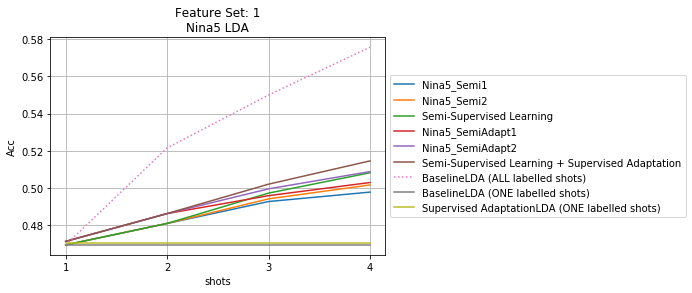

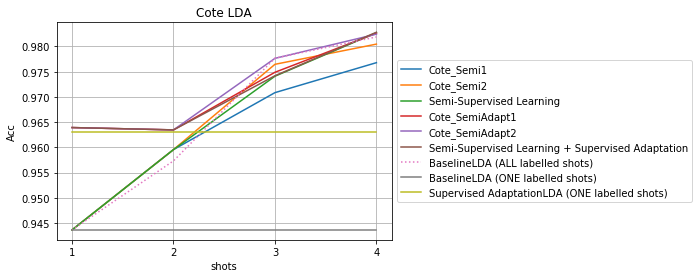

In [8]:
featureSet=1
DA='LDA'
propDA='_L'
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

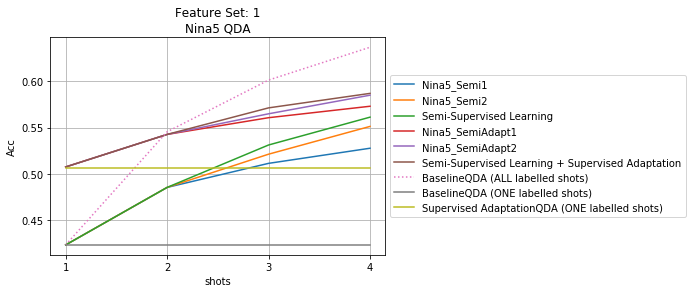

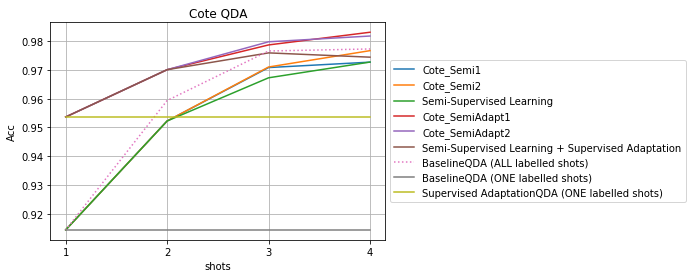

In [9]:
featureSet=1
DA='QDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

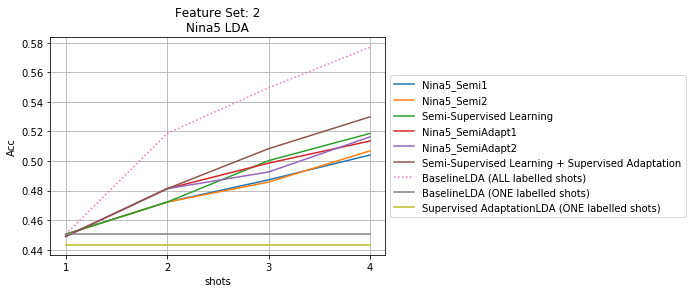

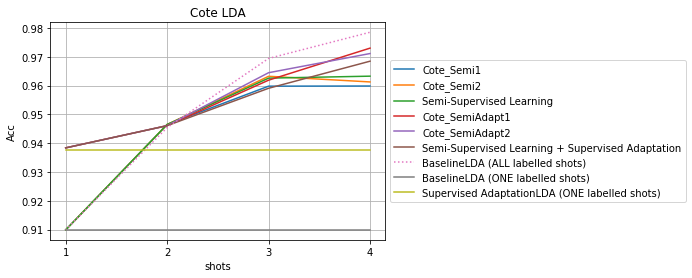

In [10]:
featureSet=2
DA='LDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

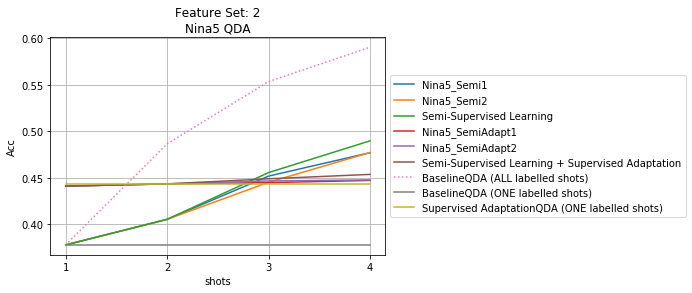

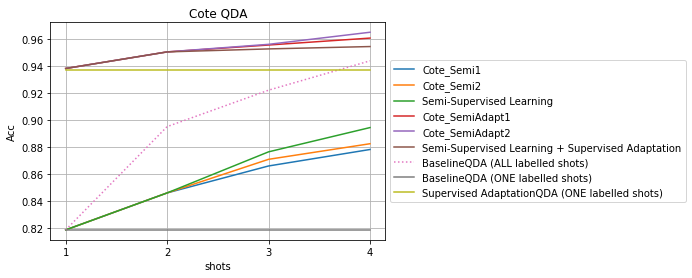

In [11]:
featureSet=2
DA='QDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

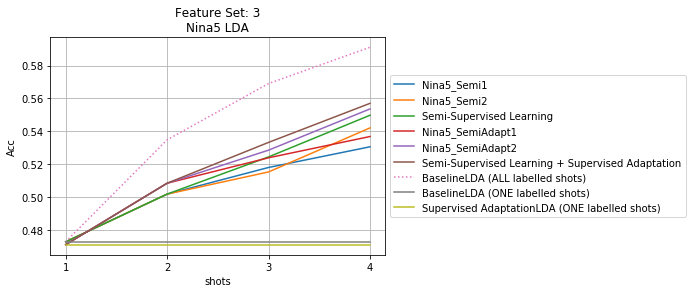

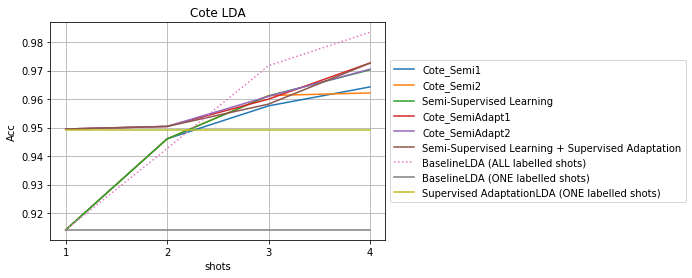

In [12]:
featureSet=3
DA='LDA'
propDA='_L'
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

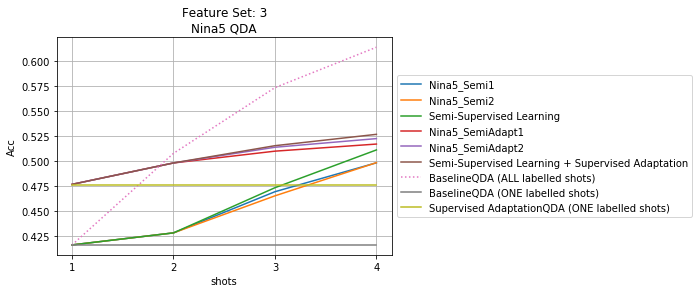

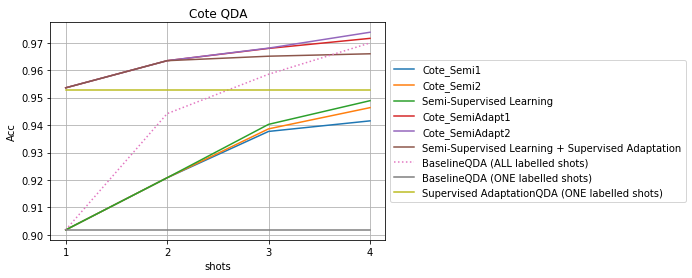

In [13]:
featureSet=3
DA='QDA'
propDA=''
graphVector(featureSet,DA,propDA,newResultsNina5,newResultsCote)

In [23]:
resultsTest = pd.read_csv('result_noRQ1_onlyRQ1/EPN_FeatureSet_1_startPerson_' + str(31) + "_endPerson_" + str(31) + "shotStart1.csv")

for i in range(32, 60 + 1):
    auxFrame = pd.read_csv('result_noRQ1_onlyRQ1/EPN_FeatureSet_1_startPerson_' + str(i) + "_endPerson_" + str(i) + "shotStart1.csv")
    resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)
resultsTest=resultsTest.drop(columns='Unnamed: 0')
resultsTest

,person,subset,# shots,Feature Set,AccLDAfew,AccLDAadapted,LDA_ACC_accumulative,LDA_ACC_adapt_accumulative,LDA_ACC_accumulative_noRQ1,LDA_ACC_adapt_accumulative_noRQ1,...,QDA_ACC_accumulative_noRQ1,QDA_ACC_adapt_accumulative_noRQ1,QDA_ACC_accumulative_onlyRQ1,QDA_ACC_adapt_accumulative_onlyRQ1,QDA_ACC_shot,QDA_ACC_adapt_shot,QDA_ACC_shot_noRQ1,QDA_ACC_adapt_shot_noRQ1,QDA_ACC_shot_onlyRQ1,QDA_ACC_adapt_shot_onlyRQ1
0,31,"[1, 2]",2,1,0.700702,0.695778,0.740218,0.737675,0.739799,0.745109,...,0.808856,0.787843,0.615008,0.645675,0.765961,0.788132,0.808856,0.787843,0.615008,0.645675
1,31,"[1, 2, 3]",3,1,0.700702,0.695778,0.727185,0.731433,0.778350,0.770820,...,0.817930,0.815388,0.628974,0.717660,0.740765,0.732881,0.748134,0.761359,0.648410,0.650695
2,31,"[1, 2, 3, 4]",4,1,0.700702,0.695778,0.720556,0.721972,0.770402,0.776870,...,0.840488,0.841003,0.689600,0.740250,0.720910,0.718593,0.721682,0.724450,0.645482,0.625821
3,31,"[1, 2, 3, 4, 5]",5,1,0.700702,0.695778,0.718497,0.719333,0.734715,0.735552,...,0.804351,0.809435,0.682198,0.763869,0.716148,0.715954,0.711514,0.711546,0.592161,0.569636
4,31,"[1, 2, 3, 4, 5, 6]",6,1,0.700702,0.695778,0.728794,0.726477,0.724128,0.724224,...,0.759042,0.758978,0.677726,0.747780,0.742856,0.740507,0.742116,0.742663,0.602845,0.661604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,1,0.517695,0.549822,0.512322,0.594914,0.590899,0.589698,...,0.610947,0.609928,0.547857,0.561974,0.552259,0.533049,0.484864,0.535280,0.511691,0.475356
716,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",22,1,0.517695,0.549822,0.515160,0.596527,0.596684,0.596163,...,0.625973,0.622723,0.558784,0.566789,0.581379,0.550671,0.479795,0.558251,0.533740,0.542606
717,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",23,1,0.517695,0.549822,0.519562,0.596708,0.604252,0.602760,...,0.642686,0.640927,0.550452,0.565079,0.608012,0.512674,0.529192,0.594404,0.532273,0.581245
718,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",24,1,0.517695,0.549822,0.519005,0.598819,0.610328,0.609285,...,0.651951,0.650690,0.564678,0.586339,0.533461,0.541575,0.541320,0.619036,0.556868,0.544752


In [40]:
dicLDA=['AccLDAfew','LDA_ACC_accumulative','LDA_ACC_accumulative_noRQ1','LDA_ACC_accumulative_onlyRQ1',
     'LDA_ACC_shot','LDA_ACC_shot_noRQ1','LDA_ACC_shot_onlyRQ1']
dicLDA_adapt=['AccLDAadapted','LDA_ACC_adapt_accumulative','LDA_ACC_adapt_accumulative_noRQ1','LDA_ACC_adapt_accumulative_onlyRQ1',
     'LDA_ACC_adapt_shot','LDA_ACC_adapt_shot_noRQ1','LDA_ACC_adapt_shot_onlyRQ1']
dicQDA=['AccQDAfew','QDA_ACC_accumulative','QDA_ACC_accumulative_noRQ1','QDA_ACC_accumulative_onlyRQ1',
     'QDA_ACC_shot','QDA_ACC_shot_noRQ1','QDA_ACC_shot_onlyRQ1']
dicQDA_adapt=['AccQDAadapted','QDA_ACC_adapt_accumulative','QDA_ACC_adapt_accumulative_noRQ1','QDA_ACC_adapt_accumulative_onlyRQ1',
     'QDA_ACC_adapt_shot','QDA_ACC_adapt_shot_noRQ1','QDA_ACC_adapt_shot_onlyRQ1']

def graphEPN(dic,basis,resultsTest):
    shots=list(range(1,26))
    for name in dic:
        x= vectroGraph(name,basis,resultsTest,1,25)
        plt.plot(shots,x,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 25.1, 1.0))
    plt.grid()

    plt.show()    



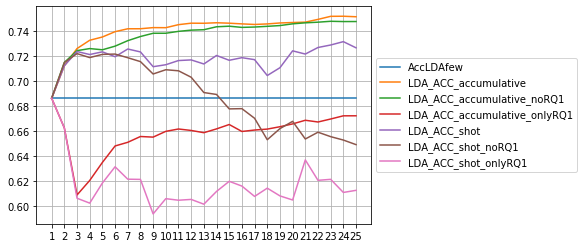

In [39]:
graphEPN(dicLDA,'AccLDAfew',resultsTest)

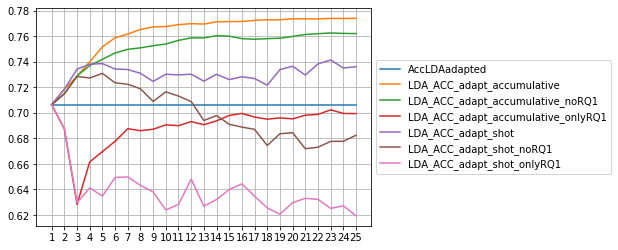

In [43]:
graphEPN(dicLDA_adapt,'AccLDAadapted',resultsTest)

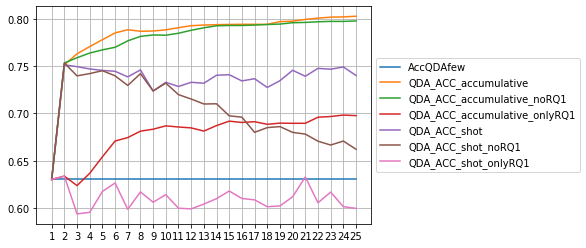

In [44]:
graphEPN(dicQDA,'AccQDAfew',resultsTest)

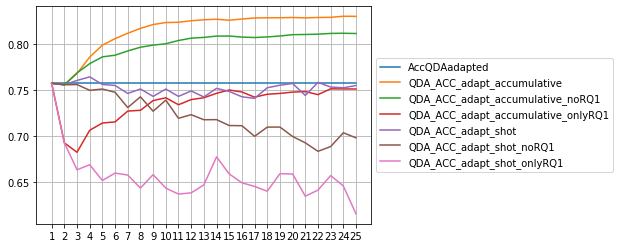

In [45]:
graphEPN(dicQDA_adapt,'AccQDAadapted',resultsTest)

# NEW Implementation


In [79]:
resultsTest = pd.read_csv('newImpleResults/EPN_FeatureSet_1_startPerson_' + str(31) + "_endPerson_" + str(31) + "shotStart1.csv")

for i in range(32, 60 + 1):
    auxFrame = pd.read_csv('newImpleResults/EPN_FeatureSet_1_startPerson_' + str(i) + "_endPerson_" + str(i) + "shotStart1.csv")
    resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)
resultsTest1=resultsTest.drop(columns='Unnamed: 0')
resultsTest1

,person,subset,# shots,Feature Set,AccLDAfew,AccLDAadapted,time_LDA_ACC_accumulative,LDA_ACC_accumulative,time_LDA_ACC_adapt_accumulative,LDA_ACC_adapt_accumulative,...,time_QDA_ACC_adapt_accumulative_noRQ1,QDA_ACC_adapt_accumulative_noRQ1,time_QDA_ACC_shot,QDA_ACC_shot,time_QDA_ACC_adapt_shot,QDA_ACC_adapt_shot,time_QDA_ACC_shot_noRQ1,QDA_ACC_shot_noRQ1,time_QDA_ACC_adapt_shot_noRQ1,QDA_ACC_adapt_shot_noRQ1
0,31,"[1, 2]",2,1,0.700702,0.699833,1.791689,0.738802,1.908556,0.732752,...,0.007463,0.763290,3.814011,0.714989,3.574378,0.741408,0.009318,0.732076,0.009572,0.763290
1,31,"[1, 2, 3]",3,1,0.700702,0.699833,3.108253,0.735230,3.478876,0.741086,...,0.008607,0.824366,2.631236,0.731240,3.349455,0.757369,0.009109,0.730886,0.009115,0.782018
2,31,"[1, 2, 3, 4]",4,1,0.700702,0.699833,4.652493,0.738287,5.020263,0.738319,...,0.009795,0.837817,3.104108,0.727764,2.631364,0.763644,0.009204,0.724192,0.009069,0.765349
3,31,"[1, 2, 3, 4, 5]",5,1,0.700702,0.699833,6.226475,0.733042,6.555889,0.736549,...,0.011103,0.840488,3.357055,0.725158,2.388865,0.754988,0.009241,0.725576,0.009093,0.762936
4,31,"[1, 2, 3, 4, 5, 6]",6,1,0.700702,0.699833,7.630408,0.735584,7.782595,0.738094,...,0.012598,0.842708,2.880712,0.733074,2.638531,0.752671,0.009186,0.727249,0.009503,0.766765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,1,0.517695,0.546826,44.601333,0.595532,45.933646,0.593567,...,0.038393,0.648252,5.233439,0.668166,4.977734,0.645705,0.009588,0.666638,0.009453,0.632098
716,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",22,1,0.517695,0.546826,47.144966,0.596090,47.678089,0.594683,...,0.039939,0.648543,4.044112,0.671429,4.039120,0.647961,0.009257,0.667875,0.009305,0.634426
717,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",23,1,0.517695,0.546826,49.187728,0.597072,49.713939,0.594647,...,0.041818,0.650836,4.046050,0.671538,4.050982,0.651588,0.009241,0.669961,0.009140,0.635930
718,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",24,1,0.517695,0.546826,51.659096,0.597909,51.584048,0.594574,...,0.043709,0.651272,4.530571,0.673030,4.289882,0.653007,0.009294,0.672132,0.009357,0.638344


In [115]:
dicLDA=['AccLDAfew','LDA_ACC_accumulative','LDA_ACC_accumulative_noRQ1',
     'LDA_ACC_shot','LDA_ACC_shot_noRQ1']
dicLDA_adapt=['AccLDAadapted','LDA_ACC_adapt_accumulative','LDA_ACC_adapt_accumulative_noRQ1',
     'LDA_ACC_adapt_shot','LDA_ACC_adapt_shot_noRQ1']
dicQDA=['AccQDAfew','QDA_ACC_accumulative','QDA_ACC_accumulative_noRQ1',
     'QDA_ACC_shot','QDA_ACC_shot_noRQ1']
dicQDA_adapt=['AccQDAadapted','QDA_ACC_adapt_accumulative','QDA_ACC_adapt_accumulative_noRQ1',
     'QDA_ACC_adapt_shot','QDA_ACC_adapt_shot_noRQ1']

dicLDA_time=['LDA_ACC_accumulative','LDA_ACC_shot']
dicLDA_adapt_time=['LDA_ACC_adapt_accumulative', 'LDA_ACC_adapt_shot']
dicQDA_time=['QDA_ACC_accumulative','QDA_ACC_shot']
dicQDA_adapt_time=['QDA_ACC_adapt_accumulative','QDA_ACC_adapt_shot']

dicLDA_time_noRQ1=['LDA_ACC_accumulative_noRQ1','LDA_ACC_shot_noRQ1']
dicLDA_adapt_time_noRQ1=['LDA_ACC_adapt_accumulative_noRQ1','LDA_ACC_adapt_shot_noRQ1']
dicQDA_time_noRQ1=['QDA_ACC_accumulative_noRQ1','QDA_ACC_shot_noRQ1']
dicQDA_adapt_time_noRQ1=['QDA_ACC_adapt_accumulative_noRQ1','QDA_ACC_adapt_shot_noRQ1']



def vectroGraph(prop,adapt_normal,base,featureSet,shots):
    vector=np.zeros(shots)
    vector[0]=base[adapt_normal].loc[(base['# shots']==2)&(base['Feature Set']==featureSet)].mean()
    for i in range(1,shots):
        vector[i]=base[prop].loc[(base['# shots']==i+1)&(base['Feature Set']==featureSet)].mean()
    return vector



def graphEPN(dic,basis,resultsTest):
    shots=list(range(1,26))
    for name in dic:
        x= vectroGraph(name,basis,resultsTest,1,25)
        plt.plot(shots,x,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 25.1, 1.0))
    plt.grid()

    plt.show()    

    
def vectroGraph_time(prop,adapt_normal,base,featureSet,shots):
    vector=np.zeros(shots-1)
    for i in range(shots-1):
        vector[i]=base[prop].loc[(base['# shots']==i+2)&(base['Feature Set']==featureSet)].mean()
    return vector
    
def graphEPN_time(dic,basis,resultsTest):
    shots=list(range(1,25))
    for name in dic:
        x= vectroGraph_time('time_'+name,basis,resultsTest,1,25)
        plt.plot(shots,x,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 25.1, 1.0))
    plt.grid()

    plt.show()    
    
def vectroGraph_var(prop,adapt_normal,base,featureSet,shots):
    vector=np.zeros(shots)
    vector[0]=base[adapt_normal].loc[(base['# shots']==2)&(base['Feature Set']==featureSet)].var()
    for i in range(1,shots):
        vector[i]=base[prop].loc[(base['# shots']==i+1)&(base['Feature Set']==featureSet)].var()
    return vector

def graphEPN_var(dic,basis,resultsTest):
    shots=list(range(1,26))
    for name in dic:
        x= vectroGraph_var(name,basis,resultsTest,1,25)
        plt.plot(shots,x,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 25.1, 1.0))
    plt.grid()

    plt.show() 

Accuracy (MEAN)

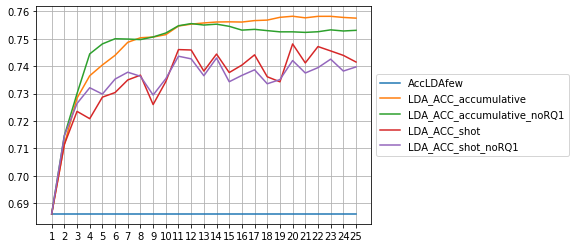

In [57]:
graphEPN(dicLDA,'AccLDAfew',resultsTest1)

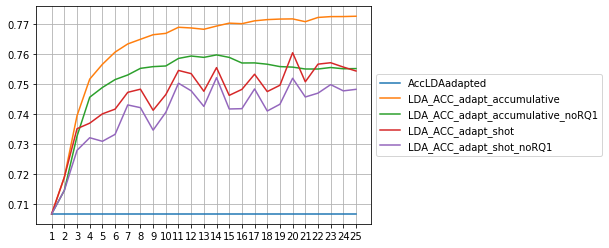

In [58]:
graphEPN(dicLDA_adapt,'AccLDAadapted',resultsTest1)

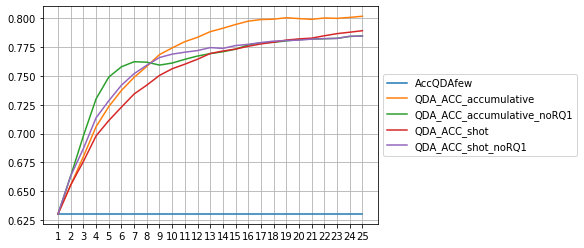

In [59]:
graphEPN(dicQDA,'AccQDAfew',resultsTest1)

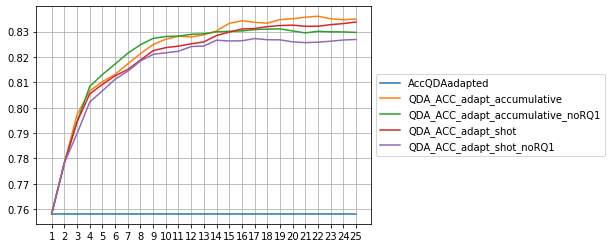

In [60]:
graphEPN(dicQDA_adapt,'AccQDAadapted',resultsTest1)

Accuracy (VAR)

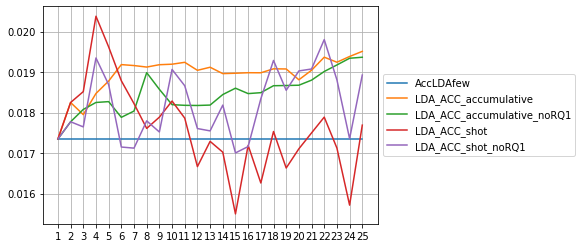

In [116]:
graphEPN_var(dicLDA,'AccLDAfew',resultsTest1)

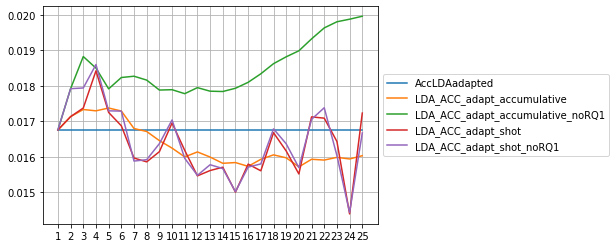

In [117]:
graphEPN_var(dicLDA_adapt,'AccLDAadapted',resultsTest1)

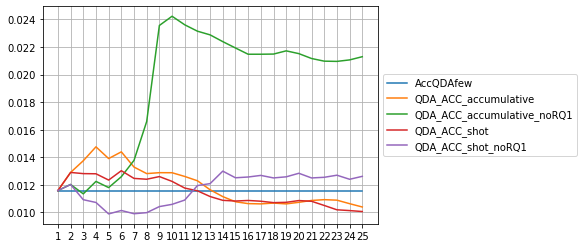

In [118]:
graphEPN_var(dicQDA,'AccQDAfew',resultsTest1)

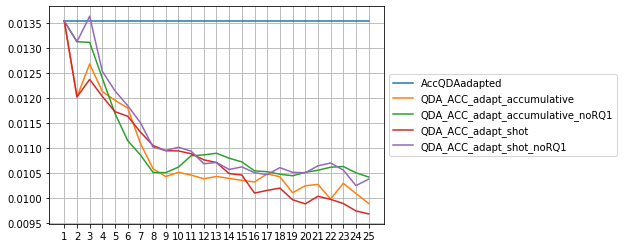

In [119]:
graphEPN_var(dicQDA_adapt,'AccQDAadapted',resultsTest1)

Time (proposed)

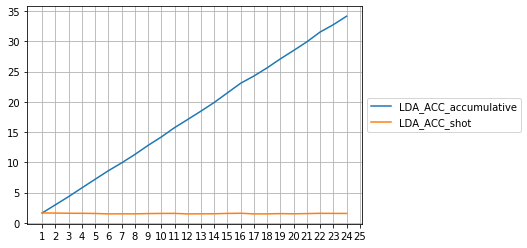

In [107]:
graphEPN_time(dicLDA_time,'AccLDAfew',resultsTest1)

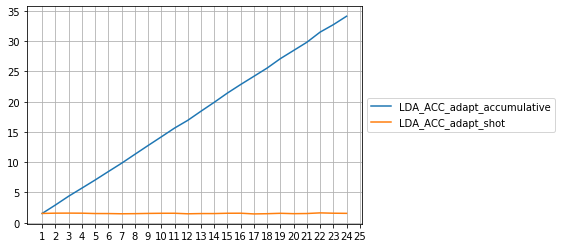

In [108]:
graphEPN_time(dicLDA_adapt_time,'AccLDAadapted',resultsTest1)

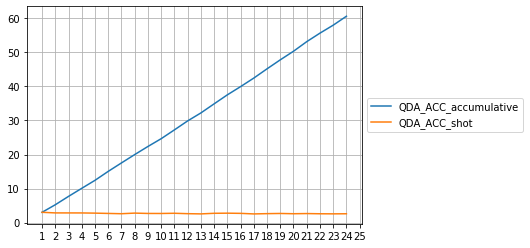

In [109]:
graphEPN_time(dicQDA_time,'AccQDAfew',resultsTest1)

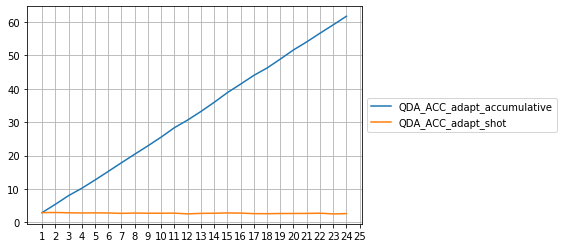

In [110]:
graphEPN_time(dicQDA_adapt_time,'AccQDAadapted',resultsTest1)

Time noRQ1

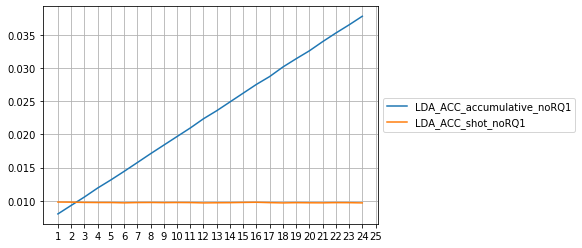

In [111]:
graphEPN_time(dicLDA_time_noRQ1,'AccLDAfew',resultsTest1)

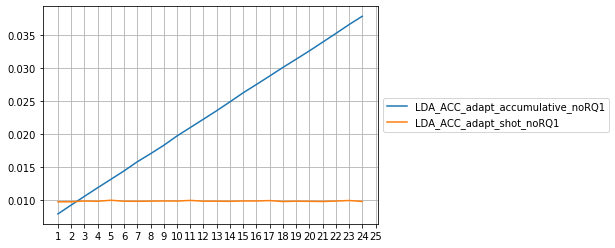

In [112]:
graphEPN_time(dicLDA_adapt_time_noRQ1,'AccLDAadapted',resultsTest1)

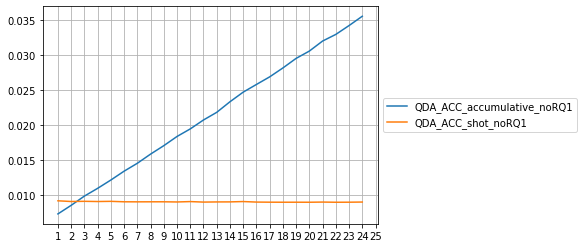

In [113]:
graphEPN_time(dicQDA_time_noRQ1,'AccQDAfew',resultsTest1)

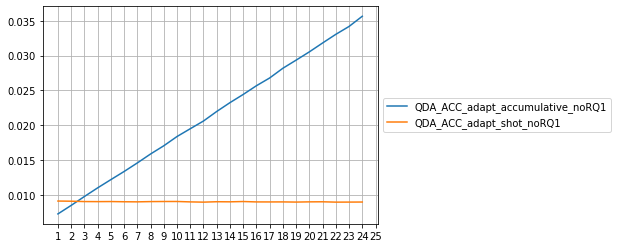

In [114]:
graphEPN_time(dicQDA_adapt_time_noRQ1,'AccQDAadapted',resultsTest1)

# NEW Implementation (2 shots)


In [61]:
resultsTest = pd.read_csv('newImpleResults/EPN_FeatureSet_1_startPerson_' + str(31) + "_endPerson_" + str(31) + "shotStart2.csv")

for i in range(32, 60 + 1):
    auxFrame = pd.read_csv('newImpleResults/EPN_FeatureSet_1_startPerson_' + str(i) + "_endPerson_" + str(i) + "shotStart2.csv")
    resultsTest = pd.concat([resultsTest, auxFrame], ignore_index=True)
resultsTest2=resultsTest.drop(columns='Unnamed: 0')
resultsTest2

,person,subset,# shots,Feature Set,AccLDAfew,AccLDAadapted,time_LDA_ACC_accumulative,LDA_ACC_accumulative,time_LDA_ACC_adapt_accumulative,LDA_ACC_adapt_accumulative,...,time_QDA_ACC_adapt_accumulative_noRQ1,QDA_ACC_adapt_accumulative_noRQ1,time_QDA_ACC_shot,QDA_ACC_shot,time_QDA_ACC_adapt_shot,QDA_ACC_adapt_shot,time_QDA_ACC_shot_noRQ1,QDA_ACC_shot_noRQ1,time_QDA_ACC_adapt_shot_noRQ1,QDA_ACC_adapt_shot_noRQ1
0,31,"[1, 2, 3]",3,1,0.791575,0.792412,1.319696,0.785655,1.550550,0.786588,...,0.007319,0.839780,3.344745,0.800747,3.103391,0.829096,0.009211,0.799846,0.009107,0.839780
1,31,"[1, 2, 3, 4]",4,1,0.791575,0.792412,3.353274,0.771174,3.485491,0.770820,...,0.008620,0.842386,2.629728,0.806410,3.347861,0.837206,0.009103,0.815163,0.009129,0.842579
2,31,"[1, 2, 3, 4, 5]",5,1,0.791575,0.792412,4.440412,0.764352,4.904400,0.751126,...,0.009648,0.842451,3.364849,0.816901,2.160213,0.837463,0.009248,0.826265,0.009115,0.842708
3,31,"[1, 2, 3, 4, 5, 6]",6,1,0.791575,0.792412,6.367755,0.760201,6.331754,0.752800,...,0.010917,0.850109,3.120418,0.826715,2.641217,0.840166,0.009246,0.828678,0.009218,0.848436
4,31,"[1, 2, 3, 4, 5, 6, 7]",7,1,0.791575,0.792412,7.558896,0.772204,7.806601,0.766958,...,0.012168,0.853617,2.620892,0.829483,2.620021,0.840295,0.009052,0.826490,0.009050,0.851847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,1,0.566995,0.563247,42.414077,0.576552,42.617486,0.576964,...,0.037073,0.666857,5.520675,0.668821,5.498718,0.647889,0.009571,0.670847,0.009548,0.664589
686,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",22,1,0.566995,0.563247,44.502909,0.577449,44.614028,0.577995,...,0.038472,0.670434,4.068423,0.670750,4.064832,0.650011,0.009337,0.672326,0.009318,0.667512
687,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",23,1,0.566995,0.563247,46.626315,0.577170,46.841269,0.579171,...,0.040251,0.673515,4.067174,0.673175,4.069601,0.653261,0.009223,0.673976,0.009238,0.670798
688,60,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",24,1,0.566995,0.563247,48.582639,0.579438,48.983476,0.582895,...,0.042011,0.677772,4.306425,0.674230,4.542778,0.654753,0.009410,0.676450,0.009430,0.672739


In [72]:
dicLDA=['AccLDAfew','LDA_ACC_accumulative','LDA_ACC_accumulative_noRQ1',
     'LDA_ACC_shot','LDA_ACC_shot_noRQ1']
dicLDA_adapt=['AccLDAadapted','LDA_ACC_adapt_accumulative','LDA_ACC_adapt_accumulative_noRQ1',
     'LDA_ACC_adapt_shot','LDA_ACC_adapt_shot_noRQ1']
dicQDA=['AccQDAfew','QDA_ACC_accumulative','QDA_ACC_accumulative_noRQ1',
     'QDA_ACC_shot','QDA_ACC_shot_noRQ1']
dicQDA_adapt=['AccQDAadapted','QDA_ACC_adapt_accumulative','QDA_ACC_adapt_accumulative_noRQ1',
     'QDA_ACC_adapt_shot','QDA_ACC_adapt_shot_noRQ1']

def graphEPN_2(dic,basis,resultsTest1,resultsTest2):
    shots=list(range(1,26))
    for name in dic:
        x= vectroGraph_2(name,basis,resultsTest1,resultsTest2,1,25)
        plt.plot(shots,x,label=name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    plt.xticks(np.arange(1, 25.1, 1.0))
    plt.grid()

    plt.show()    


def vectroGraph_2(prop,adapt_normal,base1,base,featureSet,shots):
    vector=np.zeros(shots)
    vector[0]=base1[adapt_normal].loc[(base1['# shots']==2)&(base1['Feature Set']==featureSet)].mean()
    vector[1]=base[adapt_normal].loc[(base['# shots']==3)&(base['Feature Set']==featureSet)].mean()
    
    for i in range(2,shots):
        vector[i]=base[prop].loc[(base['# shots']==i+1)&(base['Feature Set']==featureSet)].mean()
    return vector

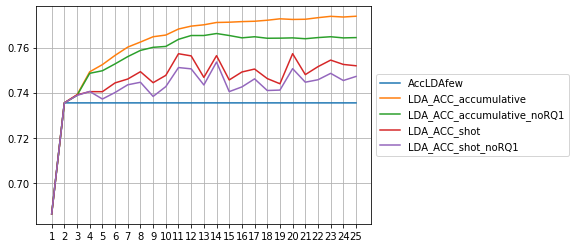

In [73]:
graphEPN_2(dicLDA,'AccLDAfew',resultsTest1,resultsTest2)

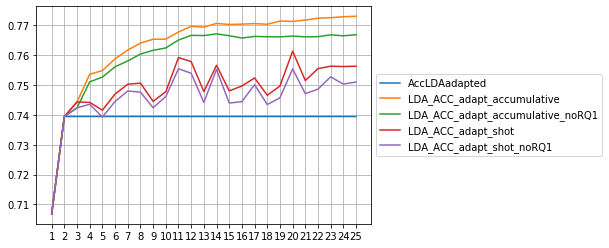

In [74]:
graphEPN_2(dicLDA_adapt,'AccLDAadapted',resultsTest1,resultsTest2)

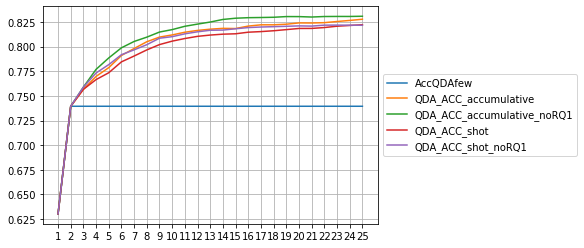

In [75]:
graphEPN_2(dicQDA,'AccQDAfew',resultsTest1,resultsTest2)

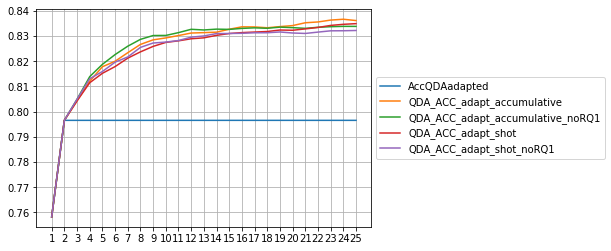

In [76]:
graphEPN_2(dicQDA_adapt,'AccQDAadapted',resultsTest1,resultsTest2)